In [ ]:
# Implementasi DCT (Discrete Cosine Transform) untuk Image Compression
# Sources: 
# https://www.mathworks.com/help/images/discrete-cosine-transform.html

In [ ]:
# Import Library
import cv2 as cv
from google.colab.patches import cv2_imshow 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
!git clone https://github.com/raihanromzi/starry_night_image.git samples

fatal: destination path 'samples' already exists and is not an empty directory.


In [ ]:
# Load image
img = cv.imread('samples/starry_night.jpg')
print(img.shape)

# Convert to Grayscale
img_grayscale = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
print(img_grayscale.shape)

(600, 752, 3)
(600, 752)


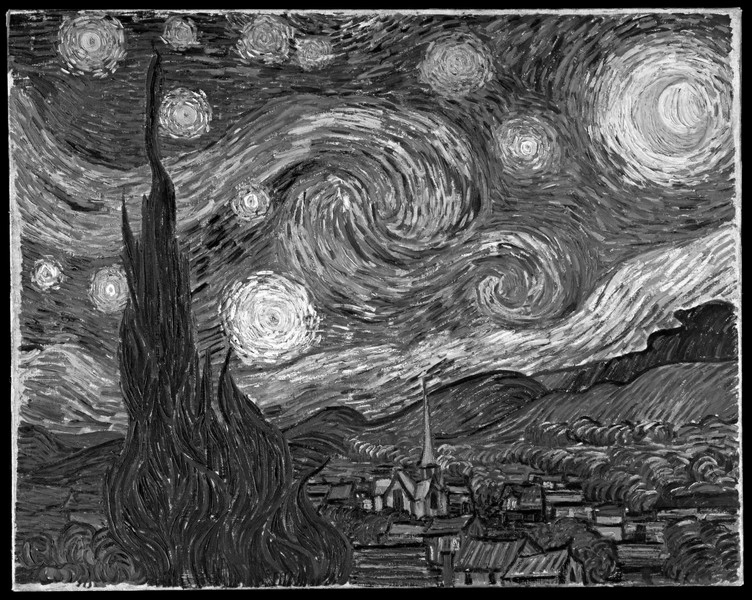

In [ ]:
# Grayscale image
cv2_imshow(img_grayscale)

In [ ]:
# Ekstraksi dalam bentuk float
img_float = img_grayscale.astype('float')
img_float

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# Proses transformasi file dengan DCT
img_dct = cv.dct(img_float)
img_dct_log = np.log(abs(img_dct))
img_dct_log

array([[11.0123085 ,  8.40503669,  4.39866228, ...,  1.35076211,
         2.10583178,  1.46689783],
       [ 9.21073463,  8.22397044,  7.22963319, ...,  1.20580508,
         1.92594584,  0.93199958],
       [ 9.29431103,  6.79266173,  8.0763006 , ...,  2.60863458,
         1.22599802,  1.65027423],
       ...,
       [ 2.41780094,  3.11445812,  1.72131933, ...,  0.8674522 ,
         0.95590303,  1.92772741],
       [ 1.52118963,  2.0861461 ,  2.98409946, ...,  1.11700409,
         1.87304312, -1.76034348],
       [-0.49210869,  1.89482839,  2.17694359, ...,  0.55285299,
         0.9885861 ,  2.09543171]])

In [ ]:
# Proses inverse DCT tahap 1
img_idct1 = cv.idct(img_dct)
img_idct1

array([[ 4.91273688e-15, -4.69901895e-14, -4.99600361e-16, ...,
         7.27535774e-14, -9.87061803e-15,  8.97573441e-14],
       [-7.55159391e-15, -5.60501873e-14, -1.03217875e-14, ...,
         9.72483148e-14,  5.31491365e-15,  1.12798756e-13],
       [ 3.11695114e-14, -3.75810494e-14,  1.45994328e-14, ...,
         1.16025614e-13,  7.78121465e-15,  1.21446751e-13],
       ...,
       [ 3.66859321e-14, -1.73358103e-14,  8.32667268e-15, ...,
         4.60949112e-14,  3.19064966e-14,  8.65250349e-14],
       [ 2.34489300e-14, -2.25259905e-14, -4.03485166e-15, ...,
         2.08491493e-14,  8.41736642e-15,  5.85946067e-14],
       [ 8.28503932e-15, -4.41123145e-14, -2.53477794e-14, ...,
         4.35419807e-14,  3.85631420e-14,  9.48101090e-14]])

In [ ]:
# Proses inverse DCT tahap 2 dengan frekuensi 100x100
recor_temp = img_dct[0:100,0:100]
recor_temp2 = np.zeros(img_grayscale.shape)
recor_temp2[0:100,0:100] = recor_temp

img_idct2 = cv.idct(recor_temp2)
img_idct2

array([[ 2.23010173,  2.22601501,  2.22047368, ...,  0.5494057 ,
         0.38793407,  0.28198981],
       [ 2.10781538,  2.01475487,  1.83749613, ...,  0.50240764,
         0.41960695,  0.35959366],
       [ 1.77300776,  1.54500135,  1.10713578, ...,  0.35054151,
         0.39096829,  0.40471302],
       ...,
       [-0.11115644, -0.00401743,  0.17857303, ..., -0.54917099,
        -0.80926636, -0.94139138],
       [-0.68275893, -0.44992902, -0.04055745, ..., -0.85270123,
        -1.15488785, -1.30360131],
       [-0.99591976, -0.69785396, -0.17037466, ..., -1.00825672,
        -1.32435634, -1.47734211]])

In [ ]:
cv.imwrite('samples/starry_night_grayscale.jpg', img_grayscale)
cv.imwrite('samples/starry_night_dct.jpg', img_dct)
cv.imwrite('samples/starry_night_idc1.jpg', img_idct1)
cv.imwrite('samples/starry_night_idc2.jpg', img_idct2)

True